## libraries

In [1]:
# python 3.13.3
# libraries
import numpy as np
import pandas as pd

## imports

In [2]:
# importing the dataset
df = pd.read_csv('./Dataset/fetal_health.csv')

## data analysis

In [3]:
# analyzing the dataset
# analyzing the features
columns = [*df.columns]
columns_length = len(columns)
print(f'number of features: {columns_length - 1}')
for i in columns[:columns_length - 1]:
    print(i)
print(f'target variable: {columns[-1]}')

number of features: 21
baseline value
accelerations
fetal_movement
uterine_contractions
light_decelerations
severe_decelerations
prolongued_decelerations
abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_long_term_variability
histogram_width
histogram_min
histogram_max
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_mode
histogram_mean
histogram_median
histogram_variance
histogram_tendency
target variable: fetal_health


fetal_health is target variable with 3 values 1, 2, 3 and 21 featues

In [4]:
# analyzing the dimensions of dataset
print(f'number of features: {df.shape[1]}')
print(f'number of data-points: {df.shape[0]}')

number of features: 22
number of data-points: 2126


In [5]:
# analyzing the type of the data given
print(df.dtypes)

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

all the data is numeric

methods which can be used are: Logistic Reg., SVM, DT, RF, KNN, Naive Bayes, Gradient Boosting Machines (e.g., XGBoost, LightGBM, CatBoost)

In [6]:
# analyzing the data properties
print(df.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

In [7]:
# analyzing the relation between the data
corr_values = df.corr()

# for i in columns:
#     print(corr_values[f'{i}'])

# print(corr_values[f'{i}'][f'{j}'])
# print(columns)
short_codes = [
    'basev',  # baseline value
    'accel',  # accelerations
    'fetmv',  # fetal_movement
    'utcon',  # uterine_contractions
    'ltdcl',  # light_decelerations
    'svdcl',  # severe_decelerations
    'prdec',  # prolongued_decelerations
    'abstv',  # abnormal_short_term_variability
    'mnstv',  # mean_value_of_short_term_variability
    'paltv',  # percentage_of_time_with_abnormal_long_term_variability
    'mnltv',  # mean_value_of_long_term_variability
    'hstwd',  # histogram_width
    'hsmn_',   # histogram_min
    'hsmx_',   # histogram_max
    'hsnpk',  # histogram_number_of_peaks
    'hsnzs',  # histogram_number_of_zeroes
    'hsmde',  # histogram_mode
    'hsmea',  # histogram_mean
    'hsmed',  # histogram_median
    'hsvar',  # histogram_variance
    'hstnd',  # histogram_tendency
    'fhlth'   # fetal_health
]
corr_matrix = [[0 for i in range(columns_length)] for j in range(columns_length)]
for i, ival in enumerate(columns):
    for j, jval in enumerate(columns):
        if float(corr_values[ival][jval]) > 0:
            corr_matrix[i][j] = f'+{float(corr_values[ival][jval]):.2f}'
        else:
            corr_matrix[i][j] = f'{float(corr_values[ival][jval]):.2f}'
# print(['-----------------------------------------------------',columns])
print(['-----',short_codes])
for i in range(columns_length):
    corr_matrix[i].insert(0, short_codes[i])
for i in range(len(corr_matrix)):
    print(corr_matrix[i])


['-----', ['basev', 'accel', 'fetmv', 'utcon', 'ltdcl', 'svdcl', 'prdec', 'abstv', 'mnstv', 'paltv', 'mnltv', 'hstwd', 'hsmn_', 'hsmx_', 'hsnpk', 'hsnzs', 'hsmde', 'hsmea', 'hsmed', 'hsvar', 'hstnd', 'fhlth']]
['basev', '+1.00', '-0.08', '-0.03', '-0.15', '-0.16', '-0.05', '-0.10', '+0.31', '-0.28', '+0.29', '-0.03', '-0.15', '+0.36', '+0.28', '-0.11', '-0.00', '+0.71', '+0.72', '+0.79', '-0.13', '+0.29', '+0.15']
['accel', '-0.08', '+1.00', '+0.05', '+0.09', '-0.11', '-0.04', '-0.13', '-0.28', '+0.21', '-0.37', '-0.14', '+0.30', '-0.15', '+0.39', '+0.19', '-0.01', '+0.24', '+0.27', '+0.27', '+0.13', '+0.03', '-0.36']
['fetmv', '-0.03', '+0.05', '+1.00', '-0.07', '+0.05', '-0.01', '+0.27', '-0.10', '+0.12', '-0.07', '+0.01', '+0.16', '-0.15', '+0.10', '+0.16', '-0.02', '-0.06', '-0.09', '-0.07', '+0.18', '-0.00', '+0.09']
['utcon', '-0.15', '+0.09', '-0.07', '+1.00', '+0.29', '+0.01', '+0.08', '-0.23', '+0.29', '-0.31', '-0.07', '+0.14', '-0.11', '+0.12', '+0.08', '+0.06', '-0.10', '-0

## dry run quick code to check what is required in pre processing

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42
                        #    , solver='liblinear'
                           )
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print("\nPredicted Probabilities (first 5):")
print(y_pred_proba[:5])

Model Evaluation:
Accuracy: 0.8824

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.68      0.62      0.65       101
         3.0       0.65      0.83      0.73        41

    accuracy                           0.88       638
   macro avg       0.76      0.80      0.78       638
weighted avg       0.88      0.88      0.88       638


Confusion Matrix:
[[466  25   5]
 [ 25  63  13]
 [  3   4  34]]

Predicted Probabilities (first 5):
[2.83323342e-02 7.83955603e-03 2.80362217e-02 1.13640352e-05
 2.74646634e-02]


# 20% 17%
### 25+3 should have fallen under wither suspect or danger but it fallen under safe thus 20% would be unsafe and 
### 7 were mis identified in A and B but should have been in dager category out of 34+7 which means 17% would most likely be in certain danger

Recall = 0.62 means 38% of “Suspect” fetuses are being missed

Recall = 0.83 this is good, since most truly dangerous cases are being caught.

But Precision = 0.65 meaning 35% of those predicted as “Pathological” are actually not (false alarms).

c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The ROC_AUC score is: 0.9489034234178572
The classification report for this model is: 
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93       497
         2.0       0.67      0.44      0.53        88
         3.0       0.80      0.75      0.78        53

    accuracy                           0.87       638
   macro avg       0.79      0.72      0.75       638
weighted avg       0.86      0.87      0.86       638



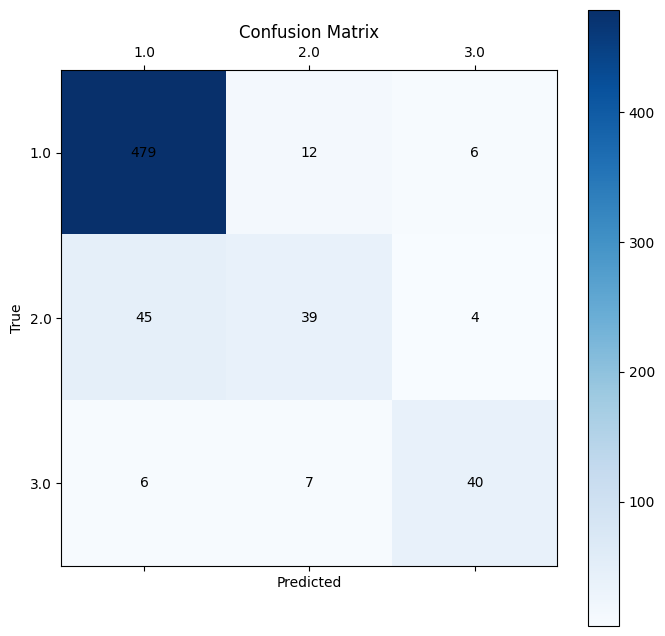

In [32]:
# Using StratifiedShuffleSplit to create the train and test datasets with similar ratio of classes
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=111)
train_idx, test_idx = next(sss.split(df.iloc[:,:-1], df.fetal_health))
X_train = df.iloc[train_idx, :-1]
y_train = df.iloc[train_idx, -1]
X_test = df.iloc[test_idx, :-1]
y_test = df.iloc[test_idx, -1]

# importing the modules
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confusion_matrix_chart(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create a heatmap from the confusion matrix
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    
    # Add the colorbar
    plt.colorbar(cax)
    
    # Add the x and y axis labels
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Add the x and y axis tick marks
    ax.set_xticks(range(len(set(y_test))))
    ax.set_yticks(range(len(set(y_test))))
    
    # Add the x and y axis tick labels
    ax.set_xticklabels(set(y_test))
    ax.set_yticklabels(set(y_test))
    
    # Add numbers inside each square of the confusion matrix
    for i in range(len(set(y_test))):
        for j in range(len(set(y_test))):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    
    # Add a title
    plt.title('Confusion Matrix')
    plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def logistic_regression_function(X_train, X_test, y_train, y_test):
    # Create an instance of the logistic regression model
    model = LogisticRegression(
        # multi_class='multinomial', 
                               solver='lbfgs', max_iter=1000)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    # Calculate the AUC score of the model
    ROC_AUC = roc_auc_score(y_test, y_proba, multi_class="ovr")
    
    # Calculate the classification report
    c_report = classification_report(y_test, y_pred)
    
    # Return the accuracy
    return y_pred, ROC_AUC, c_report


y_pred, ROC_AUC, c_report = logistic_regression_function(X_train, X_test, y_train, y_test)
print("The ROC_AUC score is: {}".format(ROC_AUC))
print("The classification report for this model is: \n{}".format(c_report))
confusion_matrix_chart(y_test, y_pred)

c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

thus need for scaling the data 

## data preprocessing

In [ ]:
# Step	Technique	            Purpose	                                Impact
# 1	    Data Import	            Load dataset & understand structure	    Identify imbalance, skewness
# 2	    Label Encoding	        Convert target labels to numeric	    Required for ML algorithms
# 3	    Stratified Split	    Preserve class ratio in train/test	    Prevent sampling bias
# 4	    Baseline Model	        Evaluate raw data	                    Revealed imbalance & scaling issues
# 5	    Random Over Sampling	Balance minority classes	            Improved recall & fairness
# 6	    Normalization	        Scale data per sample	                Helped convergence
# 7	    Skewness Check	        Detect non-normal distributions	        Found need for transformation
# 8a	√ Transform	Reduce      moderate skew	                        Partially improved normality
# 8b	Log Transform	        Reduce large skew	                    Less effective
# 8c	Yeo–Johnson	            Handle all data distributions	        Best skewness correction

## data split

In [33]:
# # Split data into training and testing sets using train_test split
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['fetal_health'])
# y = df['fetal_health']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Using StratifiedShuffleSplit to create the train and test datasets with similar ratio of classes
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=111)
# train_idx, test_idx = next(sss.split(df.iloc[:,:-1], df.fetal_health))
# X_train = df.iloc[train_idx, :-1]
# y_train = df.iloc[train_idx, -1]
# X_test = df.iloc[test_idx, :-1]
# y_test = df.iloc[test_idx, -1]

## model training

## model evaluation